In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [2]:
df=pd.read_csv(r"D:\titanic project\train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

there are 891 rows,12 columns

In [5]:
df.isnull().sum()   # columns has null values  (Age,Cabin,Embarked)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.columns= df.columns.str.lower()  #renaming  all the column names in lowercase letters

In [8]:
df.survived.unique()

array([0, 1], dtype=int64)

In [9]:
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [10]:
df.pclass.unique()

array([3, 1, 2], dtype=int64)

In [11]:
df.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [12]:
df.name.head(5)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: name, dtype: object

In [13]:
df.sex.unique()

array(['male', 'female'], dtype=object)

In [14]:
df.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [15]:
df.fare.isnull().sum()

0

In [16]:
df.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
df.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

# handeling missing values

In [18]:
df.embarked.dropna().mode()

0    S
Name: embarked, dtype: object

In [19]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True) 

In [20]:
df.embarked.isnull().sum()

0

In [21]:
df.drop(["cabin"],axis=1,inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [23]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
def striping(x):
    x=  x.split(',')[1].split('.')[0].strip()
    return x
df["name"].apply(striping).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [25]:
df["title"]=df["name"].apply(striping)   #we can predict age with honorifics word 
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [26]:
gpy=df.groupby(['title','sex']).count()
gpy.head(20)

passengerid  survived  pclass  name  age  sibsp  parch  \
title        sex                                                              
Capt         male              1         1       1     1    1      1      1   
Col          male              2         2       2     2    2      2      2   
Don          male              1         1       1     1    1      1      1   
Dr           female            1         1       1     1    1      1      1   
             male              6         6       6     6    5      6      6   
Jonkheer     male              1         1       1     1    1      1      1   
Lady         female            1         1       1     1    1      1      1   
Major        male              2         2       2     2    2      2      2   
Master       male             40        40      40    40   36     40     40   
Miss         female          182       182     182   182  146    182    182   
Mlle         female            2         2       2     2    2      2      2   
Mme          female            1         1       1     1    1      1      1   
Mr           male            517       517     517   517  398    517    517   
Mrs          female          125       125     125   125  108    125    125   
Ms           female            1         1       1     1    1      1      1   
Rev          male              6         6       6     6    6      6      6   
Sir          male              1         1       1     1    1      1      1   
the Countess female            1         1       1     1    1      1      1   

                     ticket  fare  embarked  
title        sex                             
Capt         male         1     1         1  
Col          male         2     2         2  
Don          male         1     1         1  
Dr           female       1     1         1  
             male         6     6         6  
Jonkheer     male         1     1         1  
Lady         female       1     1         1  
Major        male         2     2         2  
Master       male        40    40        40  
Miss         female     182   182       182  
Mlle         female       2     2         2  
Mme          female       1     1         1  
Mr           male       517   517       517  
Mrs          female     125   125       125  
Ms           female       1     1         1  
Rev          male         6     6         6  
Sir          male         1     1         1  
the Countess female       1     1         1

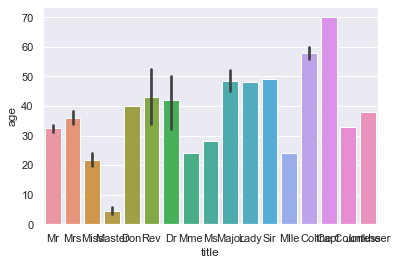

In [27]:
sns.set(rc={'figure.figsize':(15.4,6.5)})
sns.barplot(x=df.title,y=df.age)
sns.set_theme=all

In [28]:
df['age'] = df['age'].fillna(df.groupby('title')['age'].transform('mean'))

In [29]:
df["age"]=df['age'].astype(int)

In [30]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,Mr


In [31]:
df.isnull().sum()

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       0
title          0
dtype: int64

In [32]:
gpy=df.groupby(['title','sex']).count()
gpy

passengerid  survived  pclass  name  age  sibsp  parch  \
title        sex                                                              
Capt         male              1         1       1     1    1      1      1   
Col          male              2         2       2     2    2      2      2   
Don          male              1         1       1     1    1      1      1   
Dr           female            1         1       1     1    1      1      1   
             male              6         6       6     6    6      6      6   
Jonkheer     male              1         1       1     1    1      1      1   
Lady         female            1         1       1     1    1      1      1   
Major        male              2         2       2     2    2      2      2   
Master       male             40        40      40    40   40     40     40   
Miss         female          182       182     182   182  182    182    182   
Mlle         female            2         2       2     2    2      2      2   
Mme          female            1         1       1     1    1      1      1   
Mr           male            517       517     517   517  517    517    517   
Mrs          female          125       125     125   125  125    125    125   
Ms           female            1         1       1     1    1      1      1   
Rev          male              6         6       6     6    6      6      6   
Sir          male              1         1       1     1    1      1      1   
the Countess female            1         1       1     1    1      1      1   

                     ticket  fare  embarked  
title        sex                             
Capt         male         1     1         1  
Col          male         2     2         2  
Don          male         1     1         1  
Dr           female       1     1         1  
             male         6     6         6  
Jonkheer     male         1     1         1  
Lady         female       1     1         1  
Major        male         2     2         2  
Master       male        40    40        40  
Miss         female     182   182       182  
Mlle         female       2     2         2  
Mme          female       1     1         1  
Mr           male       517   517       517  
Mrs          female     125   125       125  
Ms           female       1     1         1  
Rev          male         6     6         6  
Sir          male         1     1         1  
the Countess female       1     1         1

## explory data analysiz

### making a countplot pclass feature

<AxesSubplot:xlabel='pclass', ylabel='count'>

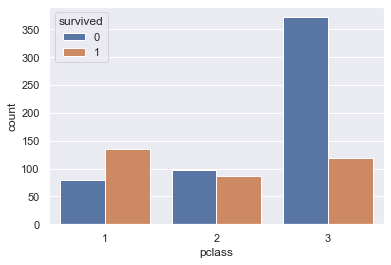

In [33]:
sns.countplot(x='pclass',hue='survived',data=df)

### making a count plot for sex feature

<AxesSubplot:xlabel='sex', ylabel='count'>

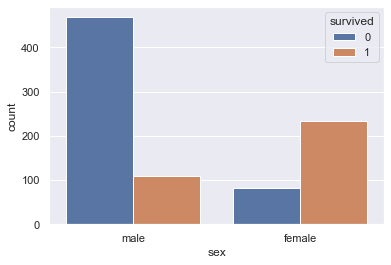

In [34]:
sns.countplot(x='sex',hue='survived',data=df)

### making a count plot for sibsp feature

<AxesSubplot:xlabel='sibsp', ylabel='count'>

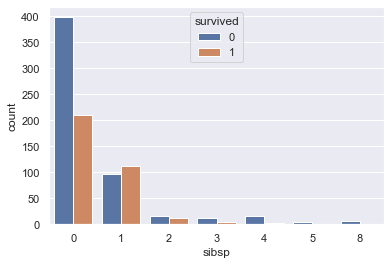

In [35]:
sns.countplot(x='sibsp',hue='survived',data=df)

### making a count plot for parch feature

<AxesSubplot:xlabel='parch', ylabel='count'>

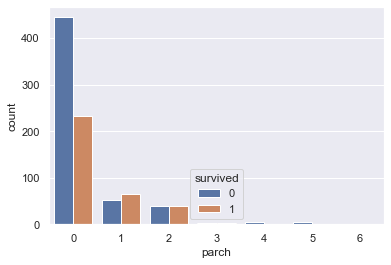

In [36]:
sns.countplot(x='parch',hue='survived',data=df)

### making a count plot for embarked feature

<AxesSubplot:xlabel='embarked', ylabel='count'>

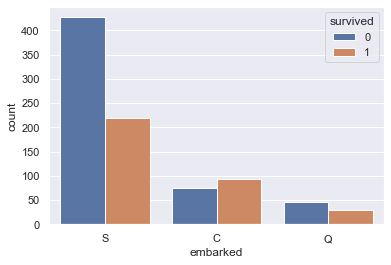

In [37]:
sns.countplot(x='embarked',hue='survived',data=df)

# ploting continous data

<AxesSubplot:xlabel='survived', ylabel='age'>

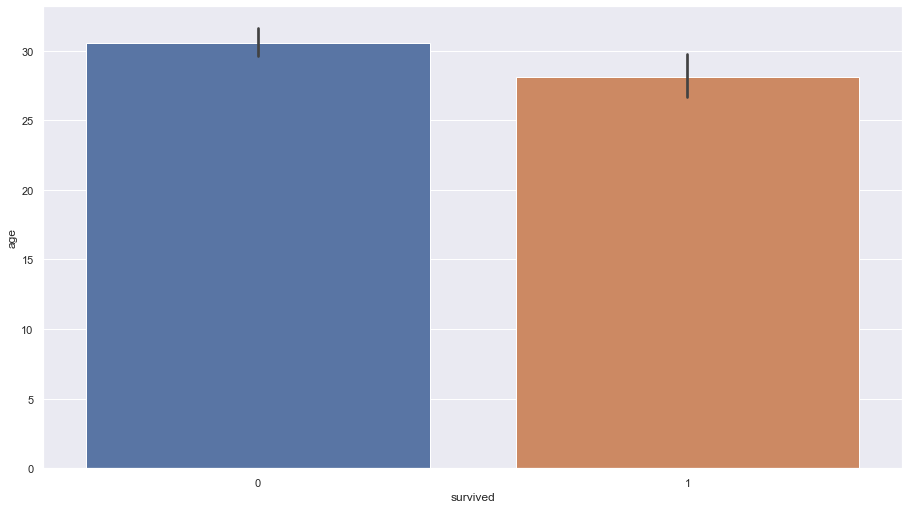

In [38]:
sns.set(rc={'figure.figsize':(15.4,8.5)})

sns.barplot(x='survived',y='age',data=df)


<AxesSubplot:xlabel='Count', ylabel='fare'>

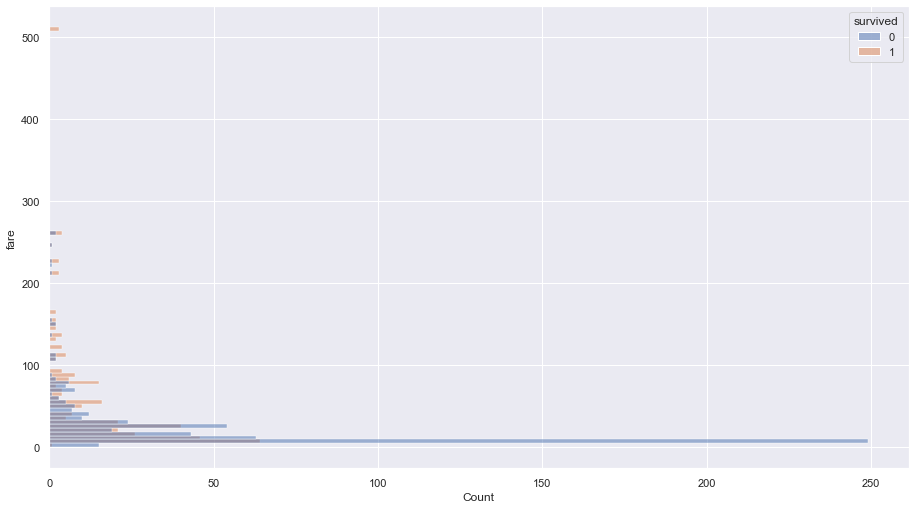

In [39]:
sns.histplot(y='fare',hue='survived',data=df)

<AxesSubplot:xlabel='fare'>

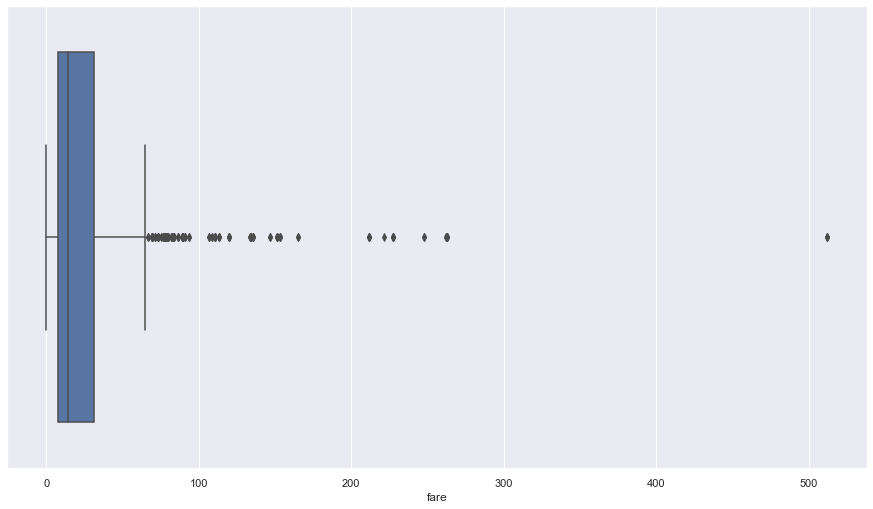

In [40]:
sns.boxplot(x=df.fare)

In [41]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,Mr


<AxesSubplot:xlabel='fare'>

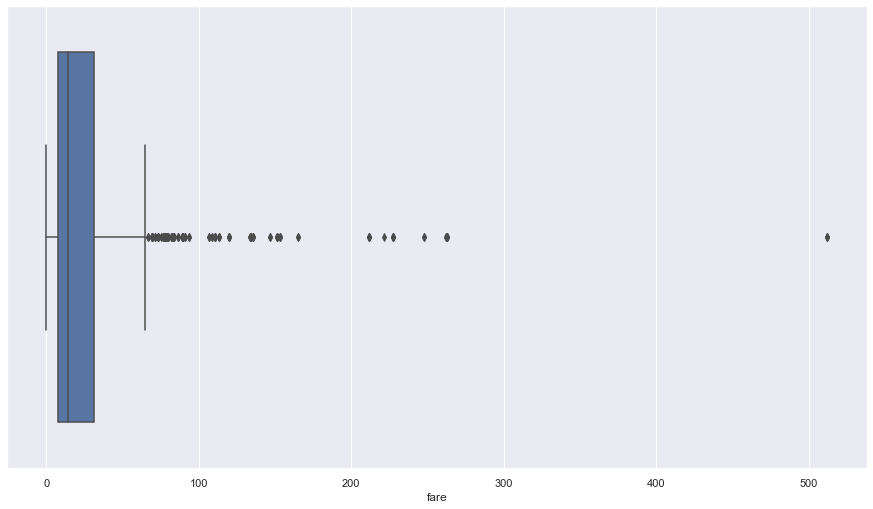

In [42]:
sns.boxplot(x=df.fare)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          891 non-null    int32  
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  embarked     891 non-null    object 
 11  title        891 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 80.2+ KB


# encoding()

### AGE

In [44]:
df.sex=df.sex.replace({"male":1,"female":0})

## embarked

In [45]:
#df.embarked=df.embarked.replace({"S":0,"Q":1,"C":2})

In [46]:
#sns.barplot(x=df.embarked,y=df.survived,order=df.groupby('embarked')['survived'].mean().reset_index().sort_values('survived')['embarked'])

In [47]:
df= pd.get_dummies(df,columns=['embarked'])

In [48]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,title,embarked_C,embarked_Q,embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,Mr,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,Mrs,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,Miss,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,Mrs,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,Mr,0,0,1


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    int64  
 5   age          891 non-null    int32  
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  title        891 non-null    object 
 11  embarked_C   891 non-null    uint8  
 12  embarked_Q   891 non-null    uint8  
 13  embarked_S   891 non-null    uint8  
dtypes: float64(1), int32(1), int64(6), object(3), uint8(3)
memory usage: 75.8+ KB


In [50]:
df.title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

<AxesSubplot:xlabel='title', ylabel='survived'>

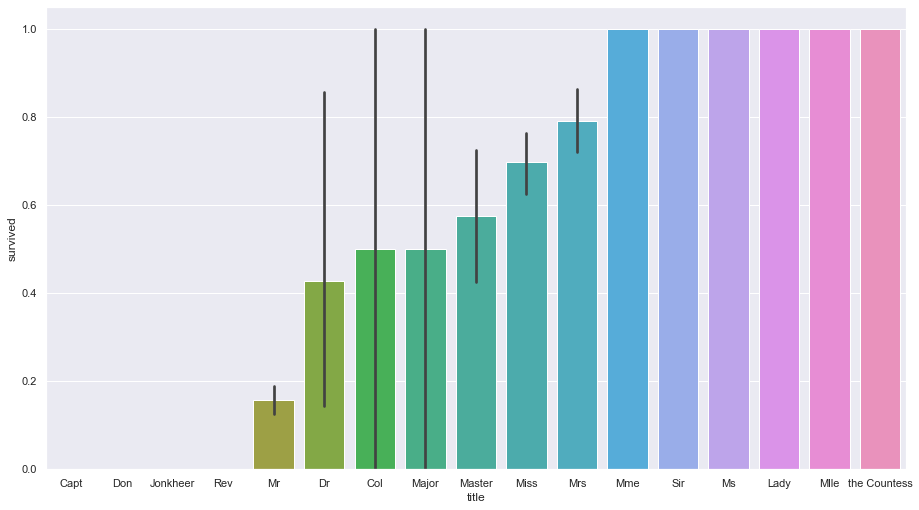

In [51]:
sns.barplot(x=df.title,y=df.survived,order=df.groupby('title')['survived'].mean().reset_index().sort_values('survived')['title'])

 title is not a usfull feature

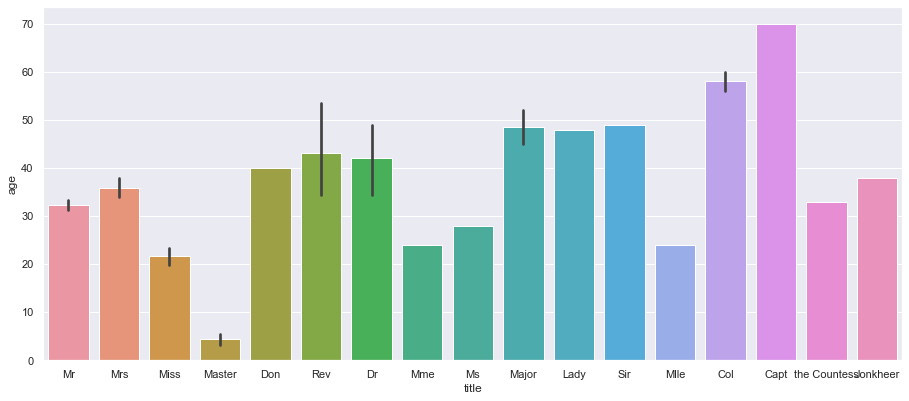

In [52]:
sns.set(rc={'figure.figsize':(15.4,6.5)})
sns.barplot(x=df.title,y=df.age)
sns.set_theme=all

In [110]:
df.isnull().sum()

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
title          0
embarked_C     0
embarked_Q     0
embarked_S     0
dtype: int64

In [111]:
df.survived.unique()

array([0, 1], dtype=int64)

# spliting

In [204]:
x=df.drop(columns=['name','ticket','title','survived'],axis=1)
y=df['survived']



In [205]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [206]:
y.shape

(891,)

In [207]:
x.shape

(891, 10)

In [208]:
x.head()

,passengerid,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,1,3,1,22,1,0,7.2500,0,0,1
1,2,1,0,38,1,0,71.2833,1,0,0
2,3,3,0,26,0,0,7.9250,0,0,1
3,4,1,0,35,1,0,53.1000,0,0,1
4,5,3,1,35,0,0,8.0500,0,0,1


In [209]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 4)

# Scalling

<AxesSubplot:>

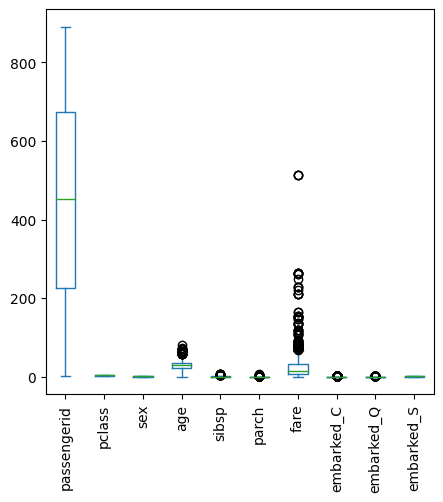

In [210]:
pd.DataFrame(x_train, columns=x_train.columns).plot.box(figsize=(5,5), rot=90)

fare clumns has big values remaing features has prety small

In [146]:
from sklearn.preprocessing import StandardScaler

In [211]:
sc = StandardScaler().fit(x_train)
x_train_sc = sc.transform(x_train)
x_train_sc = pd.DataFrame(x_train_sc, columns=x_train.columns)
x_test_sc = sc.transform(x_test)
x_test_sc = pd.DataFrame(x_test_sc, columns=x_test.columns)

In [212]:
x_test_sc

,passengerid,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,0.777128,0.838307,0.763035,-0.816129,-0.485800,-0.479852,-0.485507,-0.490325,-0.322298,0.635877
1,1.671014,0.838307,0.763035,-0.741179,-0.485800,-0.479852,-0.448516,-0.490325,-0.322298,0.635877
2,-0.338286,0.838307,-1.310556,-0.666230,-0.485800,-0.479852,-0.485822,-0.490325,3.102719,-1.572632
3,-0.979552,-1.534951,-1.310556,1.057610,-0.485800,-0.479852,-0.109432,2.039466,-0.322298,-1.572632
4,1.449486,0.838307,0.763035,-1.490675,2.223518,1.934668,-0.106033,-0.490325,-0.322298,0.635877
...,...,...,...,...,...,...,...,...,...,...
174,0.473984,0.838307,0.763035,0.158215,-0.485800,-0.479852,-0.498153,2.039466,-0.322298,-1.572632
175,-0.746364,0.838307,-1.310556,0.832761,-0.485800,1.934668,-0.251863,-0.490325,-0.322298,0.635877
176,-0.155622,0.838307,0.763035,1.582257,-0.485800,-0.479852,-0.488273,-0.490325,-0.322298,0.635877
177,1.025862,-1.534951,-1.310556,-0.441381,-0.485800,-0.479852,0.303794,2.039466,-0.322298,-1.572632


In [149]:
y_test


646    0
876    0
359    1
194    1
819    0
      ..
568    0
254    0
406    0
710    1
864    0
Name: survived, Length: 179, dtype: int64

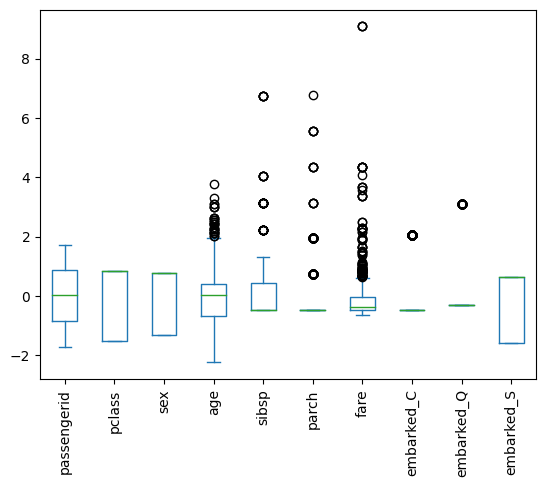

In [213]:
x_train_sc.plot.box(rot=90)
plt.show()

In [214]:
x_train_sc.fare.describe()

count    7.120000e+02
mean     1.247442e-17
std      1.000703e+00
min     -6.352888e-01
25%     -4.855074e-01
50%     -3.602273e-01
75%     -4.147613e-02
max      9.083471e+00
Name: fare, dtype: float64

In [152]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV

In [153]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [215]:
lr.fit(x_train_sc,y_train)
x_train_pred=lr.predict(x_test_sc)
x_train_pred
ac_scor=accuracy_score(y_test,x_train_pred)

print(ac_scor)


0.8268156424581006


In [216]:
x_train_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [217]:
x_test_sc=lr.predict(x_test_sc)
print(x_test_sc)

[0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1
 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0]


# Grid Search CV for Hyperparameter Tuning

In [157]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# SVC

In [218]:
params = {'C':[0.1,0.5,1,10,100],'kernel':['linear','poly','rbf','sigmoid'],'gamma':[1e-3,1e-4,1e-2,1e-1]}
gs = GridSearchCV(estimator=SVC(),param_grid=params,verbose=1)

In [219]:
gs.fit(x_train_sc,y_train)
gs.best_params_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


{'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}

In [221]:
svc = SVC(C=0.1,gamma=0.01)
svc.fit(x_train,y_train)  #Storing the predictions for the test data
pred_svc = svc.predict(x_test)
accuracy_score(y_test,pred_svc)

0.664804469273743

In [222]:
 x_testpred=svc.predict(x_test)

# DecisionTreeClassifier

In [234]:
params = {'criterion':['gini','entropy'],'max_depth':np.array(range(1,11)),
          'min_samples_leaf':np.array(range(1,11))}

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),param_grid=params,verbose=1)

In [235]:
gs.fit(x_train,y_train)
gs.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 7}

In [236]:

dtree = DecisionTreeClassifier(max_depth=6,min_samples_leaf=7,random_state=42)
dtree.fit(x_train,y_train)      # Storing the predictions for the test data
pred_dtree = dtree.predict(x_test)
accuracy_score(y_test,pred_dtree)


0.8770949720670391

# RandomForestClassifier

In [237]:
params = {'n_estimators':[100,200,300,400,500,600]}

gs = GridSearchCV(estimator=RandomForestClassifier(max_depth=7,min_samples_leaf=3,random_state=42),param_grid=params,verbose=1)

In [238]:
gs.fit(x_train,y_train)
gs.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


{'n_estimators': 300}

In [239]:
rfc = RandomForestClassifier(300,max_depth=7,min_samples_leaf=3,random_state=42)
rfc.fit(x_train,y_train)     # Storing the predictions for the test data
pred_rfc = rfc.predict(x_test)
accuracy_score(y_test,pred_rfc)

0.8547486033519553

# cross_val_score

In [226]:
model1 = [LogisticRegression(),KNeighborsClassifier(),SVC()]
model2 = [DecisionTreeClassifier(random_state=42),RandomForestClassifier(random_state=42)]

In [227]:
def getCVscore(ac):
    res = []
    for model in ac:
        res.append(cross_val_score(model,x_train_sc,y_train,cv=10,scoring='accuracy').mean())
    return res

In [228]:
print("CVaccuracyScor",getCVscore(model1))

CVaccuracyScor [0.7892410015649453, 0.7891236306729266, 0.8130672926447575]


In [229]:
def getcvscore(ac):
    re=[]
    for model in ac:
        re.append(cross_val_score(model,x_train,y_train,cv=10,scoring='accuracy').mean())
    
    return re

In [230]:
print("CVacuracy scor",getcvscore(model2))

CVacuracy scor [0.7668818466353678, 0.8060250391236308]


# confution matrix

In [231]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


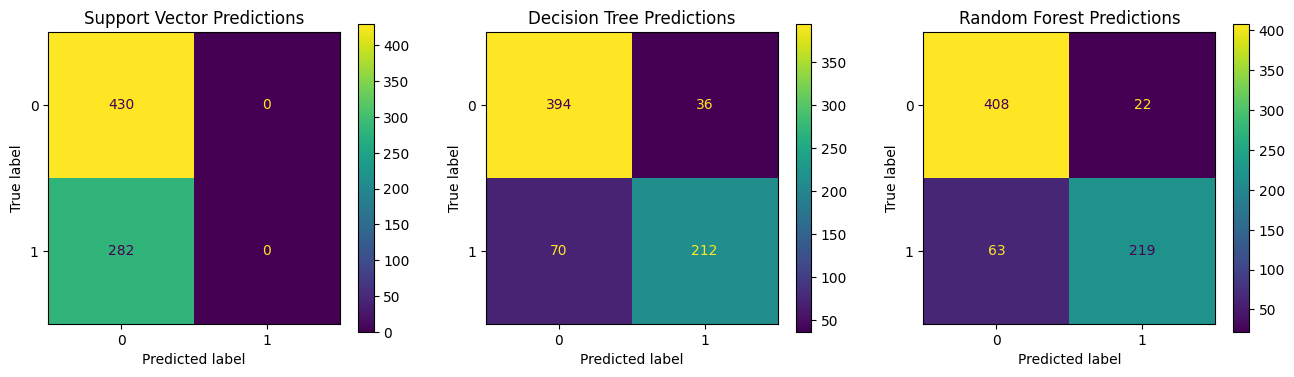

In [240]:
sns.reset_orig()
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))

ConfusionMatrixDisplay.from_predictions(y_train,svc.predict(x_train_sc),
                                        ax=ax1)
ax1.set_title('Support Vector Predictions')

ConfusionMatrixDisplay.from_predictions(y_train,dtree.predict(x_train),
                                        ax=ax2)
ax2.set_title('Decision Tree Predictions')

ConfusionMatrixDisplay.from_predictions(y_train,rfc.predict(x_train),
                                        ax=ax3)
ax3.set_title('Random Forest Predictions')

plt.show()

# best accuracy

In [248]:
submission = pd.DataFrame({
        "PassengerId":x_test["passengerid"],
        "Survived": pred_rfc
    })
submission.to_csv('submission.csv', index=False)
df2=pd.read_csv("submission.csv")
df2.head()

,PassengerId,Survived
0,647,0
1,877,0
2,360,1
3,195,1
4,820,0


# mission succesfully done